<a href="https://colab.research.google.com/github/akmalsbq/python/blob/main/Python13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy dan Matplotlib (Path Loss Simulation)
## Akmal Sabiq Muzakki-1101208145-TTX-44-01

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.zeros(4)

array([0., 0., 0., 0.])

In [3]:
np.ones(3)

array([1., 1., 1.])

**(Baris,Kolom)**

In [4]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
np.ones((5,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [6]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
np.arange(2,10)

array([2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.arange(3,47,4)

array([ 3,  7, 11, 15, 19, 23, 27, 31, 35, 39, 43])

Arange = (Awal,Akhir,delta)

In [9]:
np.arange(4,5,0.1)

array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [10]:
np.arange(2,-4,-0.5)

array([ 2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. , -2.5, -3. ,
       -3.5])

In [11]:
np.linspace(2,10,4)

array([ 2.        ,  4.66666667,  7.33333333, 10.        ])

In [12]:
np.linspace(2,-4,4)

array([ 2.,  0., -2., -4.])

In [13]:
e=np.arange(0,20,2)

In [14]:
len(e)

10

In [15]:
e.reshape(5,2)

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14],
       [16, 18]])

In [16]:
e.reshape(2,5)

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18]])

In [17]:
print(e)

[ 0  2  4  6  8 10 12 14 16 18]


In [18]:
f=e.reshape(5,2)

In [19]:
print(f)

[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]
 [16 18]]


In [20]:
np.random.random((3,4))

array([[0.79449596, 0.28236344, 0.84300811, 0.50538988],
       [0.16071777, 0.76880471, 0.68112903, 0.77135735],
       [0.62187111, 0.67226223, 0.68716795, 0.20507961]])

In [21]:
np.random.randint(1,20,10)

array([ 7, 19, 18, 14, 11,  5, 15, 13,  8, 16])

In [22]:
np.random.randn(3)

array([ 0.01621286,  0.52304417, -0.06788927])

# **Grafik Frekuensi 1800MHz pada Daerah Urban, Open, dan Sub Urban**

In [23]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [24]:
f=1800 #MHz
loc1='urban'
loc2='open'
loc3='suburban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [25]:
print(d)

[575 659 268 688 695 555 669 694 420 368 457 496 389 507 215 525 677 615
 297 638 562 356 274 406 557 516 559 576 414 427 423 635 668 425 521 511
 283 659 347 595 631 480 418 200 539 204 579 343 239 563 530 648 625 224
 363 403 638 361 544 339 240 632 314 259 472 330 369 330 614 435 529 671
 468 235 226 459 404 697 455 269 568 595 633 383 479 309 375 413 617 280
 384 608 481 484 295 374 488 272 231 516 388 423 491 505 620 683 301 619
 666 520 551 335 530 463 467 566 637 300 222 462 461 592 462 337 343 499
 601 440 423 531 515 554 442 380 684 410 599 373 385 350 374 250 201 656
 386 481 331 578 200 476 604 202 368 613 387 284 230 484 405 372 507 691
 345 552 423 641 493 316 205 565 323 595 650 465 665 592 376 353 601 685
 316 387 467 349 542 536 340 344 609 228 678 242 675 607 522 590 229 409
 654 419]


In [26]:
LpUrban=cos(f,loc1,tower,user,d)
LpOpen=cos(f,loc2,tower,user,d)
LpSuburban=cos(f,loc3,tower,user,d)

In [27]:
print(LpUrban, LpOpen, LpSuburban)

[184.51650088 186.43720858 173.76330575 187.04383667 187.18643176
 184.01782092 186.64935472 187.1661492  180.09179773 178.22999474
 181.28108017 182.43463788 179.01173029 182.74362058 170.65941807
 183.2350508  186.81680082 185.46383172 175.21059846 185.98102224
 184.19437411 177.76300487 174.07519091 179.61425242 184.0684909
 182.99147866 184.11897926 184.5409774  179.88911456 180.3246334
 180.19205607 185.91462979 186.62828331 180.25850071 183.12731614
 182.8543185  174.53044108 186.43720858 177.40231336 184.99812856
 185.82561694 181.97275265 180.02456019 169.64069205 183.60576266
 169.91963656 184.61415283 177.23899284 172.15010153 184.21941631
 183.36857064 186.20009722 185.69103403 171.23706683 178.03729354
 179.50978046 185.98102224 177.95946883 183.73583041 177.07375648
 172.20891681 185.84792294 175.99465037 173.28213511 181.73600358
 176.69473171 178.26822064 176.69473171 185.44090863 180.5861024
 183.34196773 186.69140322 181.61611999 171.91235348 171.36227866
 181.34259222

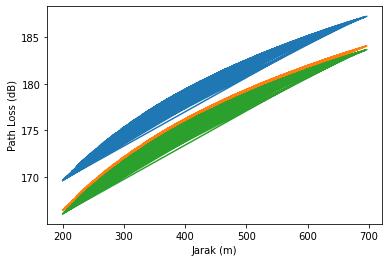

In [28]:
plt.figure()
plt.plot(d,LpUrban)
plt.plot(d,LpOpen)
plt.plot(d,LpSuburban)
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [29]:
d_sort=d[np.argsort(d)]
Urban_sort1=LpUrban[np.argsort(d)]
Open_sort2=LpOpen[np.argsort(d)]
Suburban_sort3=LpSuburban[np.argsort(d)]

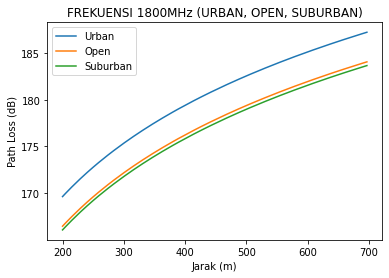

In [30]:
plt.figure()
plt.title('FREKUENSI 1800MHz (URBAN, OPEN, SUBURBAN)')
plt.plot(d_sort,Urban_sort1, label='Urban')
plt.plot(d_sort,Open_sort2, label="Open")
plt.plot(d_sort,Suburban_sort3, label="Suburban")
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

# **Grafik Model Urban pada Frekuensi 700MHz, 900MHz, dan 1800MHz**

In [31]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [32]:
f1=700 #MHz
f2=900 #MHz
f3=1800 #MHz
loc='urban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [33]:
print(d)

[554 403 413 307 515 443 448 263 514 275 381 413 335 583 452 639 310 235
 614 592 244 517 468 391 492 271 675 527 537 284 288 326 455 403 581 357
 643 279 415 489 479 528 689 235 519 589 217 284 626 466 668 266 407 307
 476 535 225 599 558 524 213 279 406 480 415 670 226 374 418 683 506 523
 266 555 507 593 309 643 481 606 664 540 218 610 686 509 486 449 479 482
 521 534 617 240 288 672 301 663 574 295 281 567 658 447 309 483 254 362
 504 686 682 405 656 238 434 255 604 469 502 582 290 201 536 416 540 467
 212 698 648 536 655 437 333 604 333 620 691 574 604 638 640 636 680 508
 418 294 388 531 255 281 221 356 623 268 694 466 591 467 392 304 406 340
 549 216 541 678 597 544 537 542 614 338 439 680 645 408 456 625 309 348
 472 640 550 503 417 395 609 688 429 607 532 538 316 279 416 283 402 307
 608 458]


In [34]:
LpUrban700=cos(f1,loc,tower,user,d)
LpUrban900=cos(f2,loc,tower,user,d)
LpUrban1800=cos(f3,loc,tower,user,d)

In [35]:
print(LpUrban700, LpUrban900, LpUrban1800)

[171.35335993 166.87072297 167.21599117 163.0380153  170.32509577
 168.20374882 168.36184517 160.85896287 170.29771727 161.48744946
 166.07996122 167.21599117 164.26750133 172.07207498 168.487057
 173.3640262  163.17499762 159.27329599 172.80185113 172.28786837
 159.80269499 170.37969366 168.97706249 166.44491007 169.68152116
 161.28105401 174.13606804 170.64955321 170.91433991 161.94107054
 162.13808407 163.8838887  168.58024083 166.87072297 172.02366862
 165.16345999 173.45192813 161.69086436 167.28404076 169.59536653
 169.30431821 170.67625698 174.4252385  159.27329599 170.43408075
 172.21630393 158.15078963 161.94107054 173.0744965  168.9167359
 173.98922581 161.01873288 167.00984743 163.0380153  169.215818
 170.86177926 158.66075437 172.45345157 171.4547002  170.56913679
 157.88871253 161.69086436 166.97519492 169.33369515 167.28404076
 174.03133717 158.72322116 165.81875198 167.3855027  174.30203447
 170.07675215 170.54222897 161.01873288 171.37876343 170.10456309
 172.31164261 1

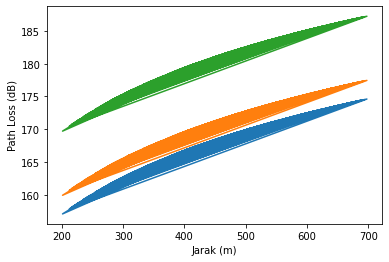

In [36]:
plt.figure()
plt.plot(d,LpUrban700)
plt.plot(d,LpUrban900)
plt.plot(d,LpUrban1800)
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [37]:
d_sort=d[np.argsort(d)]
Urban_sort1=LpUrban700[np.argsort(d)]
Urban_sort2=LpUrban900[np.argsort(d)]
Urban_sort3=LpUrban1800[np.argsort(d)]

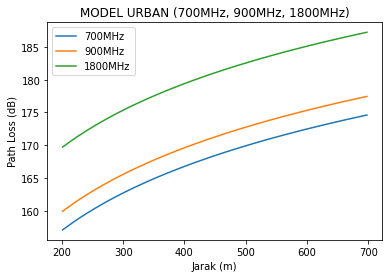

In [38]:
plt.figure()
plt.plot(d_sort,Urban_sort1, label='700MHz')
plt.plot(d_sort,Urban_sort2, label='900MHz')
plt.plot(d_sort,Urban_sort3, label='1800MHz')
plt.legend()
plt.title('MODEL URBAN (700MHz, 900MHz, 1800MHz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()